# MLTS Exercise 08 - Dynamic Time Warping

In this exercise you will be implementing the DTW algorithm.
DTW trys to find a global alignment between two sequences X and Y.
There are three important conditions that the alignment has to fulfill:
 - Boundary condition
    - Enforces that the first and last element of the two sequences are matched
 - Monotonicity condition
    - An alignment can only be made with the current elements or next elements of the two sequences
    - One of the indexes has to advance
 - Step-size condition
    - No element in X and Y can be skipped

### Algorithm Cost Matrix
* Inputs: x<sub>1:N</sub> and y<sub>1:K</sub>

* Cost/Distance matrix: $M \in \mathbb{R}^{N+1 \times K+1}$

* Initialization:   <br>
for $i=1$ to N: $M_{i,0} = \infty$ <br>
for $j=1$ to K: $M_{0,j} = \infty$ <br>
$M_{0,0} = 0$

* Calculate cost matrix: <br>
for $i=1$ to N: <br>
  &nbsp;&nbsp;&nbsp;&nbsp; for $j=1$ to K: <br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $dist(x_i,y_j) = |x_i-y_j|$ <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $M_{i,j} = dist(x_i,y_j) + min(M_{i-1,j-1}, M_{i-1,j}, M_{i,j-1})$ <br>

### Algorithm Optimal Warping Path

* Select optimal warping path <br>
$d = \{q_1, ..., q_l\}$<br>
Starting at $q = (N, K)$, repeat until $q = (0, 0)$:<br>
&nbsp; If N == 0: $q = (0, K - 1)$ <br>
&nbsp; If K == 0: $q = (N - 1, 0)$ <br>
&nbsp; Else: $q = argmin\{M(n-1, k-1), M(n-1, k), M(n, k-1)\}$ <br>
&nbsp; &nbsp; Important: argmin is not unique, always take cell with smallest index (N, K)

* Get cost of optimal warping path <br>
$c_P = \sum_{(i, j) \in d} dist(x_i,y_j)$


### Task:

* Implement the calculation of the cost matrix in `dtw(s, t)`
* Computate the optimal wrapping path in `compute_optimal_warping_path(D)`
* Calculate the cost of the optimal wrapping path

Let's first import all the packages that you will need during this assignment.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Define helper functions

In [2]:
def show_cost_matrix(M: np.array, d: np.array = None):
    """Display the cost matrix.
    
    Args:
        M (array): Cost matrix M.
        d (array, optional): Optimal path.
    """
    # setup
    plt.figure()

    plt.imshow(M, cmap='gray_r', origin='lower', aspect='equal')
    plt.title('Cost Matrix $M$')

    if d is not None:
        # plot optimal path
        plt.plot(d[:, 1], d[:, 0], marker='o', color='r')
        plt.title('$M$ with optimal warping path d')

    plt.xlabel('Sequence Y')
    plt.ylabel('Sequence X')
    plt.colorbar()
    plt.show()

Define and visualize the data:

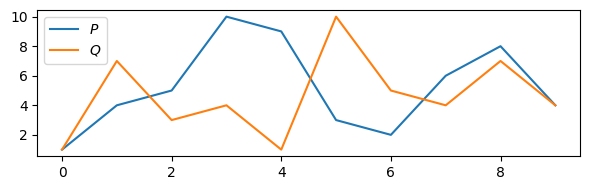

In [3]:
P = [1, 4, 5, 10, 9, 3, 2, 6, 8, 4]
Q = [1, 7, 3, 4, 1, 10, 5, 4, 7, 4]

# Display created figure
plt.figure(figsize=(6, 2))
plt.plot(P, label='$P$')
plt.plot(Q, label='$Q$')

plt.legend()
plt.tight_layout()

Define methods for DTW algorithm and calculation of optimal warping path:

In [4]:
def dtw(s: list, t: list) -> np.array:
    """Compute the accumulated cost matrix

    Args:
        s (list): Sequence 1.
        t (list): Sequence 2.

    Returns:
        dtw_matrix (np.ndarray): Accumulated cost matrix
    """
    # Define cost matrix
    n, k = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, k + 1))

    # Initialization of cost matrix
    for i in range(n + 1):
        for j in range(k + 1):
            dtw_matrix[i,j] = np.inf
    dtw_matrix[0, 0] = 0

    # Calculate Costs
    for i in range(1, n + 1):
        for j in range(1, k + 1):
            cost = abs(s[i - 1] - t[j - 1])
            last_min = np.min([dtw_matrix[i - 1, j], dtw_matrix[i, j - 1],
                               dtw_matrix[i - 1, j - 1]])
            dtw_matrix[i, j] = cost + last_min

    return dtw_matrix

Get DTW matrix:

Accumulated cost matrix D =
[[inf 42. 24. 20. 17. 20. 24. 19. 18. 18. 15.]
 [inf 39. 21. 19. 17. 20. 18. 18. 19. 15. 18.]
 [inf 32. 20. 14. 13. 17. 16. 15. 15. 14. 16.]
 [inf 27. 19. 11. 12. 12. 20. 14. 13. 17. 18.]
 [inf 26. 14. 10. 11. 13. 16. 11. 12. 16. 17.]
 [inf 24. 10. 14. 16. 19.  9. 12. 17. 18. 21.]
 [inf 16.  8. 12. 11. 14.  8. 13. 18. 16. 21.]
 [inf  7.  5.  5.  5.  8. 12. 12. 13. 15. 16.]
 [inf  3.  3.  4.  4.  7. 13. 14. 14. 17. 17.]
 [inf  0.  6.  8. 11. 11. 20. 24. 27. 33. 36.]
 [ 0. inf inf inf inf inf inf inf inf inf inf]]
DTW distance DTW(X, Y) = 15.0


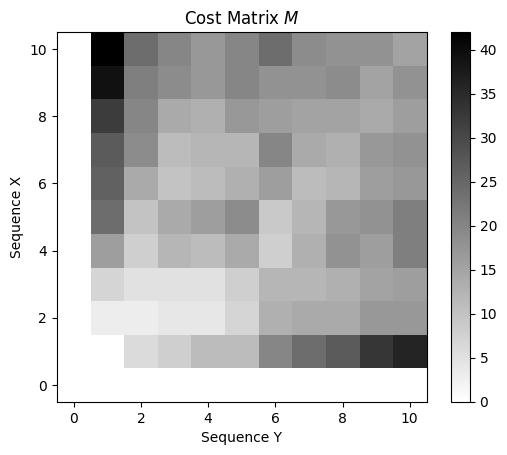

In [5]:
# get cost matrix
distance_matrix = dtw(P, Q)

# Print and show matrix
print('Accumulated cost matrix D =', np.flip(distance_matrix, axis=0), sep='\n')
print('DTW distance DTW(X, Y) =', distance_matrix[-1, -1])
show_cost_matrix(distance_matrix)

In [6]:
def compute_optimal_warping_path(M: np.array) -> np.array:
    """Compute the warping path given an accumulated cost matrix.

    Args:
        M (np.ndarray): Accumulated cost matrix

    Returns:
        d (np.ndarray): Optimal warping path
    """
    # init optimal path with highest position
    n = M.shape[0] - 1
    k = M.shape[1] - 1
    OP = [(n, k)]

    # go from highest to the lowest
    while n > 0 or k > 0:
        # corner cases, not needed through infinity
        # if n == 0:
        #     cell = (0, k - 1)
        # elif k == 0:
        #     cell = (n - 1, 0)
        # else:

        # select element that should be added to optimal wrapping path
        val = min(M[n - 1, k - 1], M[n - 1, k], M[n, k - 1])
        if val == M[n - 1, k - 1]:
            cell = (n - 1, k - 1)
        elif val == M[n - 1, k]:
            cell = (n - 1, k)
        else:
            cell = (n, k - 1)

        # add selected cell to list
        OP.append(cell)
        (n, k) = cell

    # reverse list, starting with [0, 0]
    OP.reverse()

    return np.array(OP)

In [9]:
def compute_cost_of_d(s: list, t: list, d: np.array) -> float:
    """Compute the cost of the optimal wraping path.
    
    Args:
        s (list): Sequence 1.
        t (list): Sequence 2.
        d (array, optional): Optimal path.

    Returns:
        cost_op (float): Cost of OP.
    """
    # Eliminate first element [0, 0]
    d = d[1:]

    cost_op = sum(abs(s[n - 1] - t[k - 1]) for (n, k) in d)
    return cost_op

Compute optimal warping path:

Optimal warping path P = [[0, 0], [1, 1], [2, 2], [2, 3], [2, 4], [3, 5], [4, 6], [5, 6], [6, 7], [7, 8], [8, 9], [9, 9], [10, 10]]
Normalized accumulated alignment cost: 15


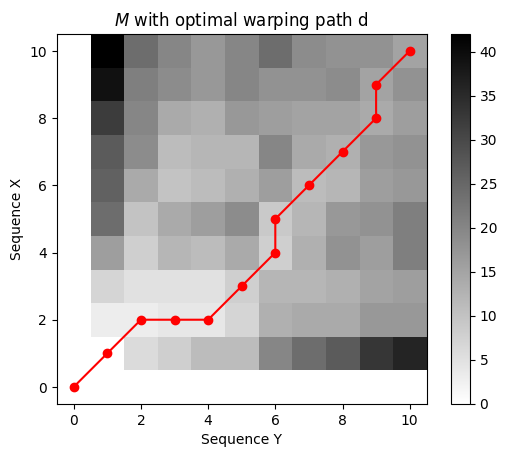

In [10]:
# compute the optimal path
optimal_path = compute_optimal_warping_path(distance_matrix)

# compute the cost of the optimal path
cost_path = compute_cost_of_d(P, Q, optimal_path)

# Print results
print('Optimal warping path P =', optimal_path.tolist())
print('Normalized accumulated alignment cost:', cost_path)
show_cost_matrix(distance_matrix, optimal_path)